3.43


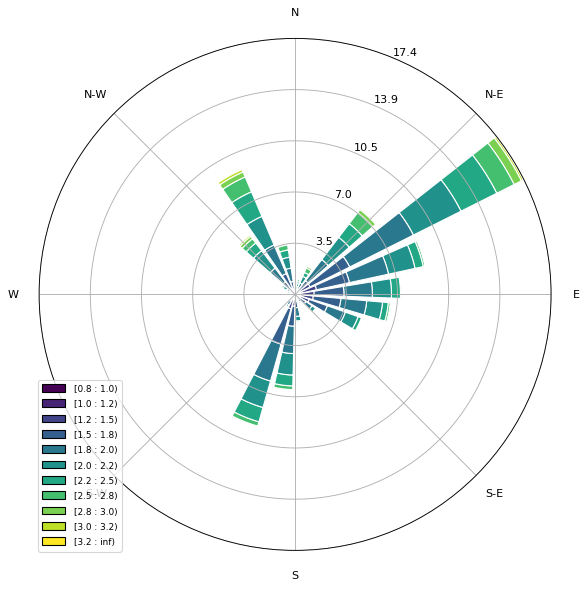

In [46]:
# Plot the windrose for wave height through the full time series (2005-2017)

from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas

viridis = plt.get_cmap('viridis') # Get viridis colormap for plotting

dp = np.load('dp_all_0360.npy') # Load in wave direction
hs = np.load('hs_all_0360.npy') # Load in significant wave height

print(max(hs)) # Print the maximum wave height for all events

plt.figure(1) # Initialize figure 1
ax = WindroseAxes.from_ax() # Can add rmax here to determine the size of the largest circle
ax.bar(dp, hs, normed=True, opening=0.8, edgecolor='white',cmap=viridis,bins=np.arange(0.75, 3.5, 0.25),nsector=25)
# ax.box is also an option, but it looks much worse than ax.bar, so I haven't used it here
ax.set_legend()

plt.show() # Show figure in console
#plt.savefig('hs_all_360.png',dpi=300,format='png') # Save the figure ## Can do transparent=True here 

plt.close()

In [36]:
# Plot the windrose from January 2015 - this is just for visual comparison to the waverose above.

from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas

viridis = plt.get_cmap('viridis') # Get viridis colormap for plotting

dp_201501 = np.load('dp_0360.npy') # Load in wave direction
hs_201501 = np.load('hs_0360.npy') # Load in significant wave height

plt.figure(2) # Initialize figure 2
ax = WindroseAxes.from_ax() # can add rmax here
ax.bar(dp_201501, hs_201501, normed=True, opening=0.8, edgecolor='white',cmap=viridis,bins=np.arange(0.75, 3.5, 0.25),nsector=25)
ax.set_legend()

#plt.show() # Show figure in console
plt.savefig('hs_201501.png',dpi=300,format='png') # Save the figure ## Can do transparent=True here 

plt.close()

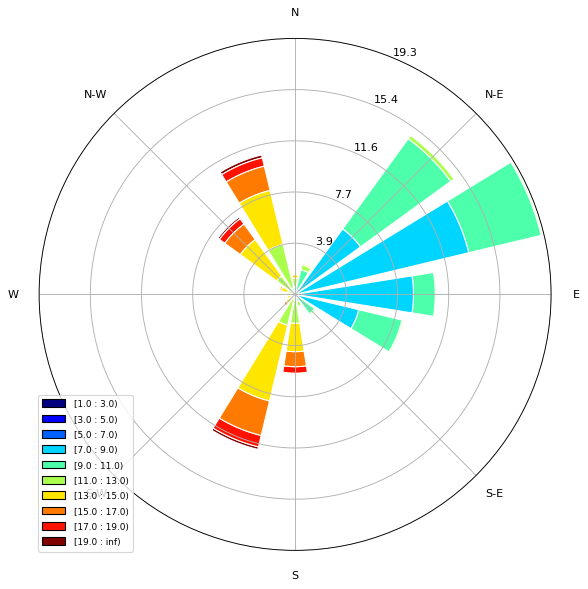

In [38]:
# Plot the windrose for wave period through the full time series (2005-2017)

from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas

dp = np.load('dp_all_0360.npy') # Load in wave direction
tp = np.load('tp_all_0360.npy') # Load in wave period

plt.figure(3)
ax = WindroseAxes.from_ax() # can add rmax here
ax.bar(dp, tp, normed=True, opening=0.8, edgecolor='white',bins=np.arange(1,20,2))
ax.set_legend()

plt.show()

plt.close()

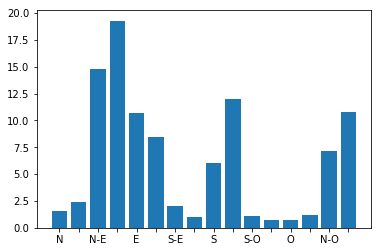

In [6]:
# Make a bar plot of wave frequency from different directions

import numpy as np
ax.bar(dp, hs, normed=True, nsector=16)
table = ax._info['table']
dp_freq = np.sum(table, axis=0)

plt.figure(4)
direction = ax._info['dir']
dp_freq = np.sum(table, axis=0)
plt.bar(np.arange(16), dp_freq, align='center')
xlabels = ('N','','N-E','','E','','S-E','','S','','S-O','','O','','N-O','')
xticks=np.arange(16)
plt.gca().set_xticks(xticks)
plt.draw()
plt.gca().set_xticklabels(xlabels)
plt.draw()

plt.show()

plt.close()

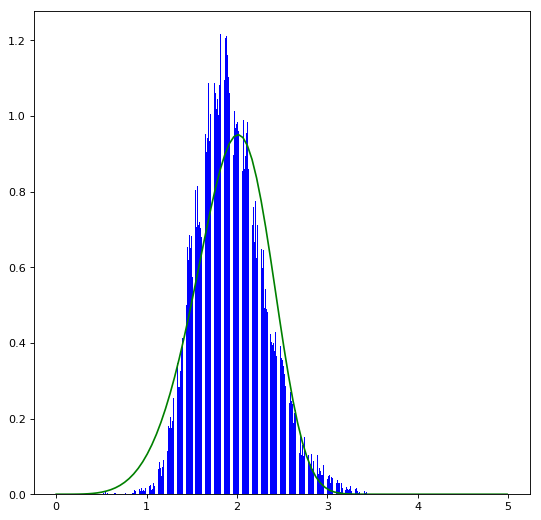

In [11]:
from windrose import WindAxes

hs2 = hs[3:] # The first few values in hs are suspicious, and may be throwing the model fitting off. Remove for this analysis.

plt.figure(5)
ax = WindAxes.from_ax()
bins = np.arange(0, 4 + 1, 0.01)
bins = bins[1:]
ax, params = ax.pdf(hs2, bins=bins)
plt.show()
plt.close()

print(params) # print the parameters of the fit.

In [45]:
# who knows?
import matplotlib.pyplot as plt
import scipy
import scipy.stats

#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
x = scipy.arange(hs)
#y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

dist = getattr(scipy.stats, 'gamma')
param = dist.fit(hs)
print(param)
print(x)

#for dist_name in dist_names:
#    dist = getattr(scipy.stats, dist_name)
#    param = dist.fit(y)
#    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
#    plt.plot(pdf_fitted, label=dist_name)
#    plt.xlim(0,47)
#plt.legend(loc='upper right')
#plt.show()

TypeError: only length-1 arrays can be converted to Python scalars